Prueba 2 Inteligencia Artificial, Israel Díaz Rosas 

In [ ]:
#importamos las librerias necesarias para trabajar con K-means y con SOM
library(cluster)
library(kohonen)
#leemos el dataset y lo tratamos como dataframe
digitos<-read.table("digitos.txt", sep=" ", header=TRUE)
digitos<-as.data.frame(digitos)
# summary(digitos)
#dividimos el dataset en features y class
dF<-subset(digitos,select=-V1)
dC<-digitos$V1
# summary(dF)
# summary(dC)

res <- princomp(dF, cor=TRUE)

# K-MEANS 

In [78]:
#K-means
# seleccionamos un K=4, puesto que sabemos a priori cuales deben de ser los valores(1,3,7,8)
# con un maximo de 1000 iteraciones y 10 valores iniciales aleatoreos 
k0=4
k_means<-kmeans(dF,k0,iter.max=1000,nstart=10)

resKMEANS <- predict(res,k_means$centers)
resKMEANS
k_means


,Comp.1,Comp.2,Comp.3,Comp.4,Comp.5,Comp.6,Comp.7,Comp.8,Comp.9,Comp.10,⋯,Comp.247,Comp.248,Comp.249,Comp.250,Comp.251,Comp.252,Comp.253,Comp.254,Comp.255,Comp.256
1,1.6050788,-1.205703,-5.0849424,1.140680,-0.3484048,-1.3611471,1.66856967,0.6704174,1.3146320,0.2059422,⋯,0.0004061212,0.0001158098,0.0012065557,-1.353791e-03,-0.0006844867,0.0012830024,-7.111984e-04,-0.0003946387,-8.359507e-04,-4.357475e-04
2,6.7229540,-3.421173,2.2448632,-1.700655,0.6739267,0.7810784,-0.97090477,0.2114794,-0.3424223,0.1326076,⋯,0.0011259686,0.0011818266,-0.0001199179,1.056050e-03,-0.0001496222,-0.0001859427,-1.835679e-04,0.0004650485,2.413270e-04,2.496915e-04
3,0.1914724,7.222408,0.8830042,-1.289636,-0.5454996,-0.4448834,-0.41091599,-0.4333325,0.2680539,-0.1784644,⋯,-0.0008737387,-0.0003478678,-0.0001891763,2.236033e-04,0.0010462577,-0.0004691253,8.678556e-04,0.0004236130,-9.445587e-05,-5.894356e-05
4,-7.9102489,-2.167508,1.2708957,1.828455,0.1301057,0.7745392,-0.08567269,-0.3697080,-0.9973046,-0.1377517,⋯,-0.0006321008,-0.0009136668,-0.0007134720,-8.878462e-05,-0.0002231420,-0.0004644681,-9.936488e-06,-0.0004948442,5.440346e-04,1.740081e-04


K-means clustering with 4 clusters of sizes 90, 104, 97, 109

Cluster means:
          V2         V3         V4         V5         V6         V7          V8
1 -0.9865889 -0.9140889 -0.8283111 -0.6760222 -0.4674333 -0.1441556  0.12454444
2 -1.0000000 -0.9988077 -0.9367596 -0.7521635 -0.4904231 -0.2100865  0.03647115
3 -0.9935155 -0.9254124 -0.7893093 -0.6402577 -0.5187423 -0.3801031 -0.34145361
4 -1.0000000 -0.9900092 -0.9930826 -0.9997064 -0.9737615 -0.9290917 -0.56643119
          V9         V10        V11        V12        V13        V14        V15
1  0.1108000 -0.08765556 -0.2658889 -0.4297556 -0.6839444 -0.9145111 -0.9700667
2  0.2772404  0.39014423  0.2241923 -0.1625096 -0.6341731 -0.9006731 -0.9954231
3 -0.2801031 -0.23228866 -0.2221856 -0.1508866 -0.1834433 -0.3764330 -0.6634845
4  0.5119450  0.04861468 -0.8024037 -0.9604128 -0.9882385 -0.9934495 -0.9885963
         V16        V17        V18        V19        V20        V21        V22
1 -0.9954889 -1.0000000 -0.9386556 -0.805566

In [68]:
tablaK<-table(dC,k_means$cluster)
tablaK
index1=max(tablaK[1,1:4])
index2=max(tablaK[2,1:4])
index3=max(tablaK[3,1:4])
index4=max(tablaK[4,1:4])
purityK<-((index1)+(index2)+(index3)+(index4))/length(dC)
print("PURITY:")
purityK

   
dC    1   2   3   4
  1   0 100   0   0
  3   8   1   3  88
  7   2   5  92   1
  8  80   3   2  15

[1] "PURITY:"


[1] 0.9

# SOM

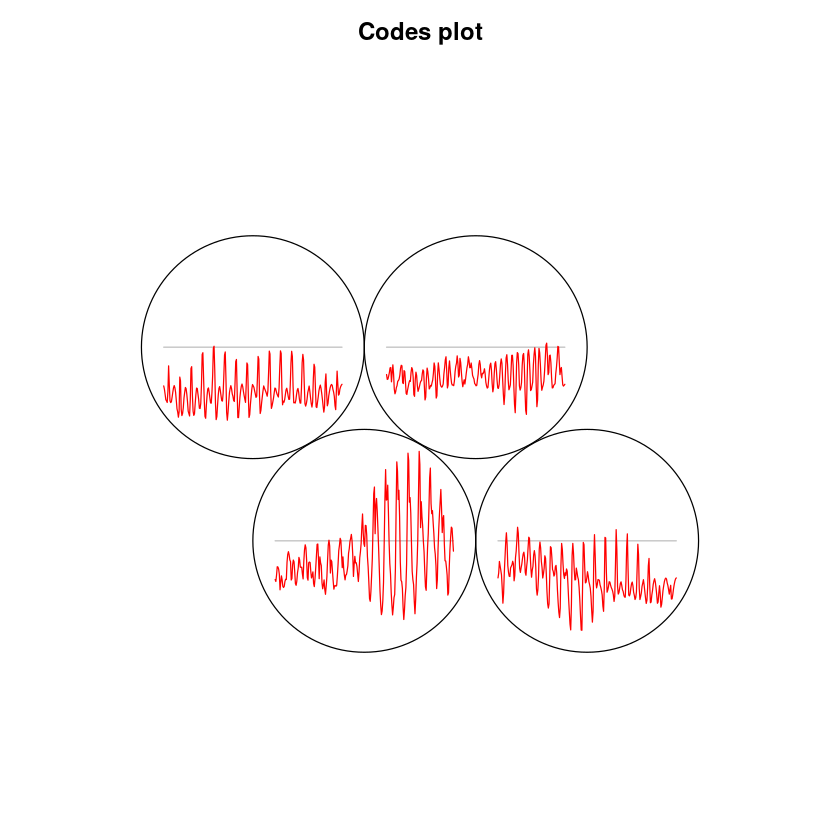

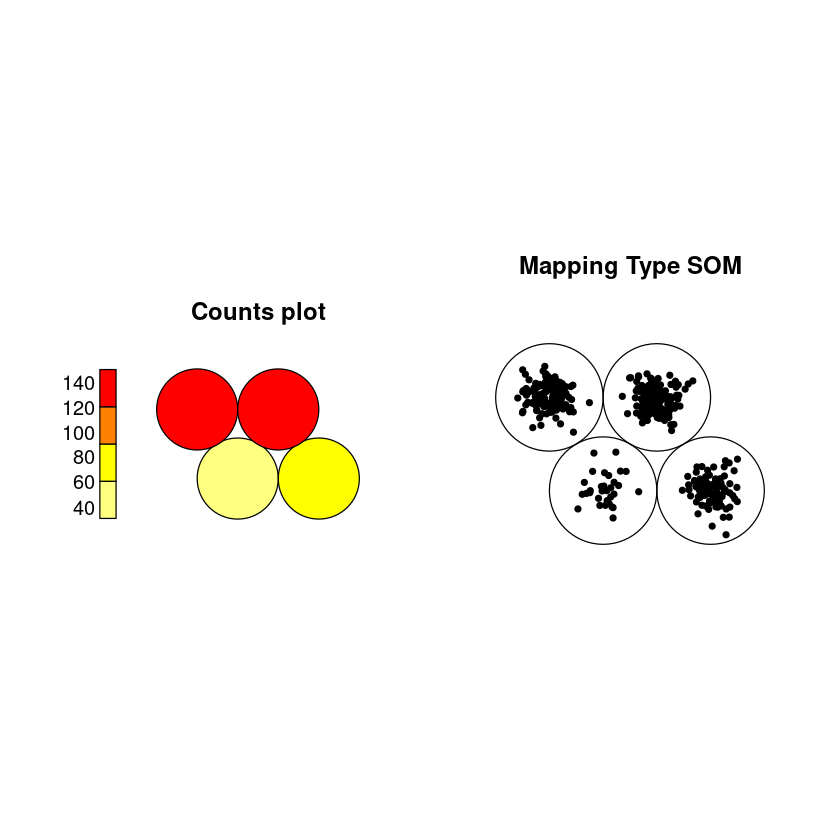

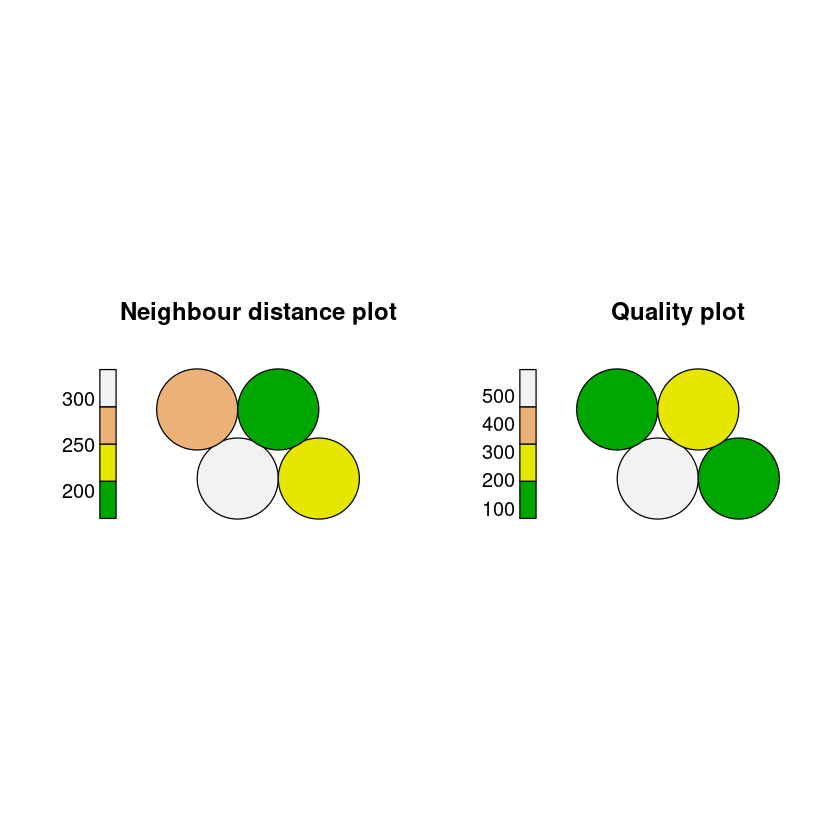

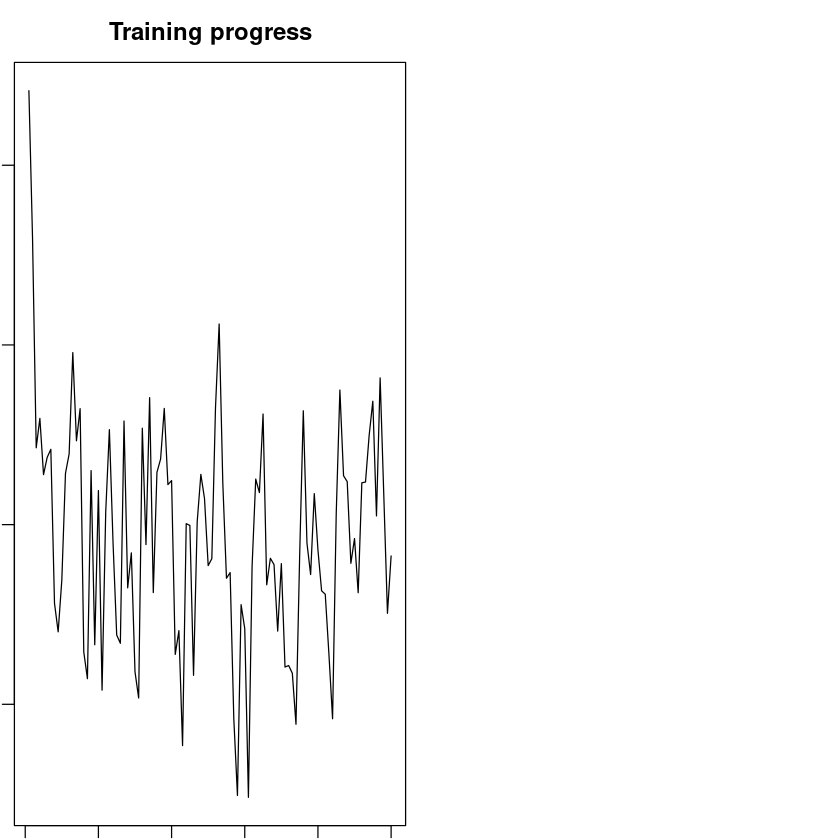

In [75]:
#SOM
#se selecciono una matriz de 2x2 para obtener directamente un resultado asociado a las 4 clases
somMap <- som(scale(dF), grid = somgrid(2,2, "hexagonal"))
plot(somMap)

colors <- function(n, alpha = 1) {
    rev(heat.colors(n, alpha))
}
par(mfrow = c(1, 2))
plot(somMap, type = "counts", palette.name = colors, heatkey = TRUE)

plot(somMap, type = "mapping", pchs = 20, main = "Mapping Type SOM")

plot(somMap, type = "dist.neighbours", palette.name = terrain.colors)
plot(somMap, type = "quality", palette.name = terrain.colors)
plot(somMap, type = "changes")

In [73]:
resSOM<-somMap$unit.classif
tablaSOM<-table(dC,resSOM)
tablaSOM
index1=max(tablaSOM[1,1:4])
index2=max(tablaSOM[2,1:4])
index3=max(tablaSOM[3,1:4])
index4=max(tablaSOM[4,1:4])
puritySOM<-((index1)+(index2)+(index3)+(index4))/length(dC)
print("PURITY:")
puritySOM

   resSOM
dC    1   2   3   4
  1   0   0   0 100
  3  38  59   3   0
  7   0   3  92   5
  8   8  84   2   6

[1] "PURITY:"


[1] 0.8375

In [80]:
tablaK
purityK

   
dC    1   2   3   4
  1   0 100   0   0
  3   8   1   3  88
  7   2   5  92   1
  8  80   3   2  15

[1] 0.9

Se utilizó purity como medida de calidad, para el cual K-means resulto ser bastante bueno, con un purity de 0.9, en cambio SOM oscila entre 0.83 y 0.88.<br>
Kmeans y SOM son capaces de "predecir" el digito 1, donde domina Kmeans a SOM es en la prediccion del digito 3.<br>
SOM tiende a "equivocarse" mucho, su grafico de entrenamiento o tasa de aprendizaje es un caos, tal parece que llegado a cierto punto comienza a generar ruido en vez de mejorar el aprendizaje.